## Implementation of PCA on the wine dataset 

Link for the dataset : (https://archive.ics.uci.edu/ml/datasets/Wine).

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### There are no missing values in the dataset

In [4]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
## splitting data into independant and dependant features
X=data.drop('quality',axis=1)
y=data['quality']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

explained_variance=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance)

n_components=np.argmax(cumulative_variance>=0.9)+1

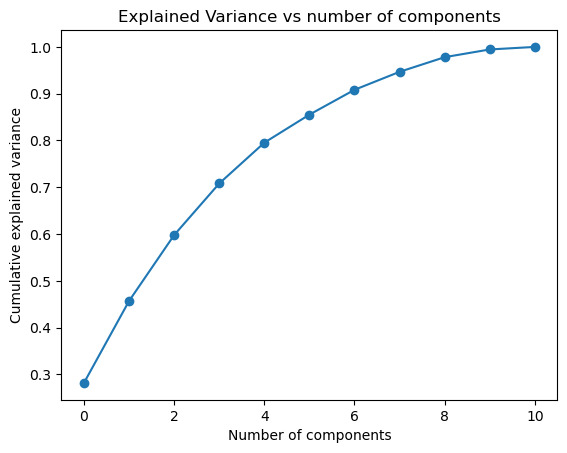

optimal number of components to retain: 7


In [6]:
plt.plot(cumulative_variance,marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance vs number of components')
plt.show()

print(f"optimal number of components to retain: {n_components}")

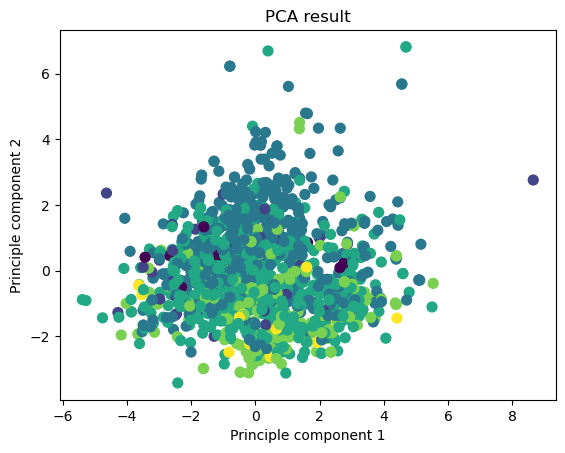

In [7]:
## visualize the result of PCA using scatter plot

plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='viridis',s=50)
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.title('PCA result')
plt.show()

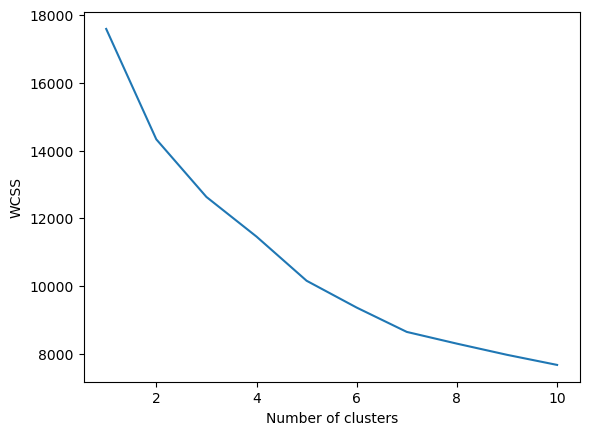

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42,init='k-means++')
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Silhoutte score for k-means clustering : 0.19197138705053213
Adjusted rand index : 0.05830047218646601


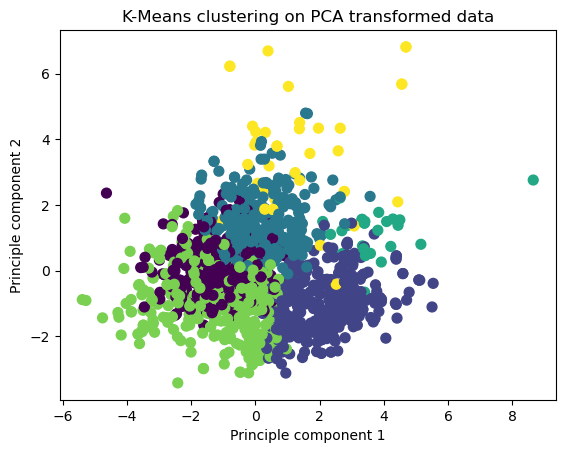

In [9]:
kmeans=KMeans(n_clusters=6,init='k-means++')
y_labels=kmeans.fit_predict(X_pca)

silhoutte=silhouette_score(X_pca,y_labels)
print(f"Silhoutte score for k-means clustering : {silhoutte}")

adjusted_rand_index=adjusted_rand_score(y,y_labels)
print(f"Adjusted rand index : {adjusted_rand_index}")
metrics_df=pd.DataFrame({
    'Silhoutte Score':[silhoutte],
    'Adjusted rand Index':[adjusted_rand_index] if adjusted_rand_index else ['N/A']
})
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_labels,cmap='viridis',s=50)
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.title('K-Means clustering on PCA transformed data')
plt.show()

In [10]:
print("Performance metrics for clustering:\n")
print(metrics_df)

Performance metrics for clustering:

   Silhoutte Score  Adjusted rand Index
0         0.191971               0.0583
